# Intro DeepChem

In [1]:
import deepchem as dc
import tensorflow as tf
import tensorflow.keras.layers as layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train = tf.one_hot(y_train, 10).numpy()
y_test = tf.one_hot(y_test, 10).numpy()
train_dataset = dc.data.NumpyDataset(x_train, y_train)
test_dataset = dc.data.NumpyDataset(x_test, y_test)

In [3]:
features = tf.keras.Input(shape=(28, 28, 1))
conv2d_1 = layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu)(features)
conv2d_2 = layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu)(conv2d_1)
flatten = layers.Flatten()(conv2d_2)
dense1 = layers.Dense(units=1024, activation=tf.nn.relu)(flatten)
dense2 = layers.Dense(units=10, activation=None)(dense1)
output = layers.Activation(tf.math.softmax)(dense2)
keras_model = tf.keras.Model(inputs=features, outputs=[output, dense2])
model = dc.models.KerasModel(
    keras_model,
    loss=dc.models.losses.SoftmaxCrossEntropy(),
    output_types=['prediction', 'loss'],
    model_dir='mnist')

In [4]:
model.fit(train_dataset, nb_epoch=10)

0.027219154834747315

In [5]:
metric = dc.metrics.Metric(dc.metrics.accuracy_score)
train_scores = model.evaluate(train_dataset, [metric])
test_scores = model.evaluate(test_dataset, [metric])
print(train_scores)
print(test_scores)

{'accuracy_score': 0.9992833333333333}
{'accuracy_score': 0.9950800000000001}


# Molecules

In [4]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

In [11]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

/home/juan_acuna/anaconda3/envs/book/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_14:0", shape=(340,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_13:0", shape=(340, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/home/juan_acuna/anaconda3/envs/book/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_17:0", shape=(986,), dtype=int32), values=Tensor("gradient_t

/home/juan_acuna/anaconda3/envs/book/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_2/Reshape_14:0", shape=(340,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_2/Reshape_13:0", shape=(340, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_2/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/home/juan_acuna/anaconda3/envs/book/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_2/Reshape_17:0", shape=(986,), dtype=int32), values=Tensor("gradient_t

/home/juan_acuna/anaconda3/envs/book/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/home/juan_acuna/anaconda3/envs/book/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_17:0", shape=(None,), dtype=int32), values=Tensor("gradien

0.10237810134887695

In [12]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score")
print(model.evaluate(train_dataset, [metric], transformers))
print("Test set score")
print(model.evaluate(test_dataset, [metric], transformers))

Training set score
{'pearson_r2_score': 0.9091030152194134}
Test set score
{'pearson_r2_score': 0.7136629027680488}


In [2]:
smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
          'CCOC(=O)CC',
          'CSc1nc(NC(C)C)nc(NC(C)C)n1',
          'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
          'Cc1cc2ccccc2cc1C']

In [14]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)
predicted_solubility = model.predict_on_batch(x)
for m,s in zip(smiles, predicted_solubility):
    print()
    print('Molecule:', m)
    print('Predicted solubility:', s)


Molecule: COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C
Predicted solubility: [-1.009957]

Molecule: CCOC(=O)CC
Predicted solubility: [1.4707849]

Molecule: CSc1nc(NC(C)C)nc(NC(C)C)n1
Predicted solubility: [-0.10435241]

Molecule: CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1
Predicted solubility: [-0.06695265]

Molecule: Cc1cc2ccccc2cc1C
Predicted solubility: [-0.8429378]


In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
smiles_list = ["CCCCC","CCOCC","CCNCC","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

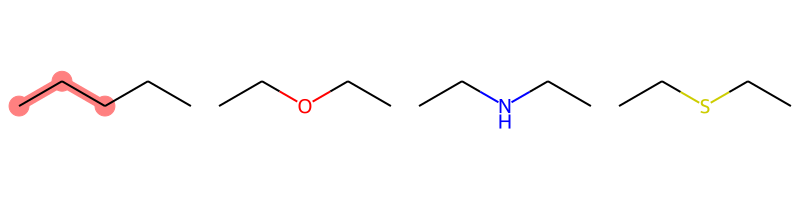

In [16]:
query = Chem.MolFromSmarts("CCC")
match_list = [mol.GetSubstructMatch(query) for mol in
mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,
highlightAtomLists=match_list)

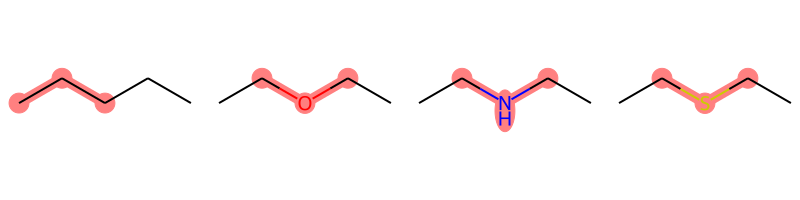

In [17]:
query = Chem.MolFromSmarts("C*C")
match_list = [mol.GetSubstructMatch(query) for mol in
mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,
highlightAtomLists=match_list)

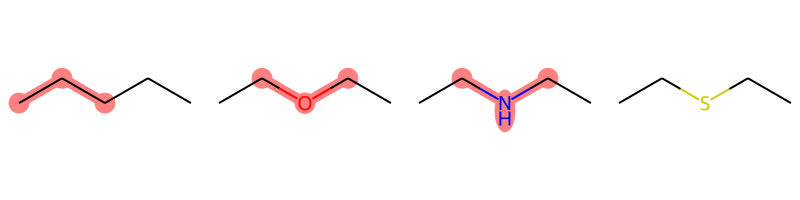

In [20]:
query = Chem.MolFromSmarts("C[C,N,O]C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,
highlightAtomLists=match_list)

# Quantum mechanics 101

<IPython.core.display.Javascript object>


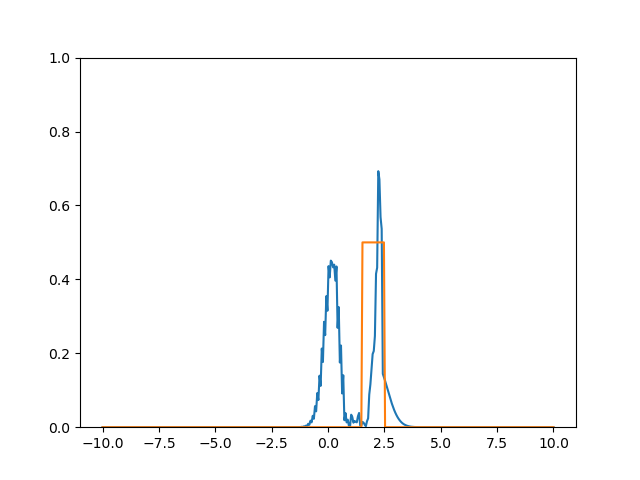

/home/juan_acuna/anaconda3/envs/book/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [3]:
from __future__ import print_function
from __future__ import division
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#def D_wrap(A, dX):
#	d = A - np.roll(A, 1)
#	d = 0.5 * (d + np.roll(d, -1))
#	return d

#doesn't wrap over, faster
def D_nowrap(A, dX):
	d = A[1:] - A[:-1]
	d = np.concatenate(([d[0]], d, [d[-1]]))
	d = 0.5 * (d[1:] + d[:-1])
	return d

D = D_nowrap	#select diff function

N = 400		#number of points
size = 10	#x in [-size, size]
dX = 2.*size/N	#x step
dt = 0.0005		#time step

X = np.linspace(-size, size, N)

x0 = -5
A = np.exp(-4*(X-x0)*((X-x0)+1500j))	#initial wave function
A = np.array(A, dtype=np.complex)

#V = np.zeros(N)
V = 0.5*(np.abs(X - 2) < 0.5)		#potential

fig, ax = plt.subplots()
line, = ax.plot(X, A)
ax.set_ylim([0, 1])

ax.plot(X, V)

def animate(i):
	global A

	for i in range(1000):	#don't show every time step
		A += dt*(1j*D(D(A, dX), dX) - 1j * V * A)	#schrodinger equation


	print(np.sum(np.abs(A**2)))	#print norm

	line.set_ydata(np.abs(A**2))

	return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25, blit=True)
plt.show()
#ani.save('sch.mp4')

# Bra-ket notation

In [4]:
from sympy.physics.quantum import Ket, Bra
from sympy import symbols, I

In [5]:
k = Ket('psi')
k

|psi>

In [6]:
k.hilbert_space

H

In [7]:
k.is_commutative

False

In [8]:
# Take a linear combination of two kets:
k0 = Ket(0)
k1 = Ket(1)
2*I*k0 - 4*k1

2*I*|0> - 4*|1>

# Quantum States and Qubits

In [2]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [5]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [6]:
for j in range(n):
    qc_output.measure(j,j)

In [7]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

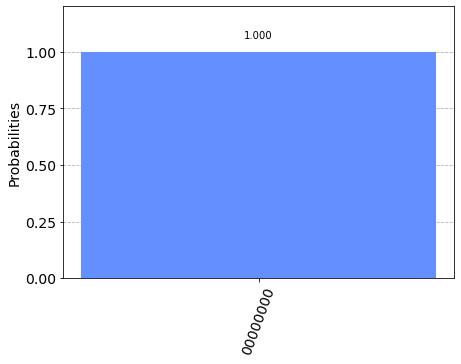

In [12]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)